In [61]:
import pandas as pd
from matplotlib import pyplot as plt
hr=pd.read_csv("HR_comma_sep.csv")

In [62]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [64]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>,
        <AxesSubplot: title={'center': 'number_project'}>],
       [<AxesSubplot: title={'center': 'average_montly_hours'}>,
        <AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'Work_accident'}>],
       [<AxesSubplot: title={'center': 'left'}>,
        <AxesSubplot: title={'center': 'promotion_last_5years'}>,
        <AxesSubplot: >]], dtype=object)

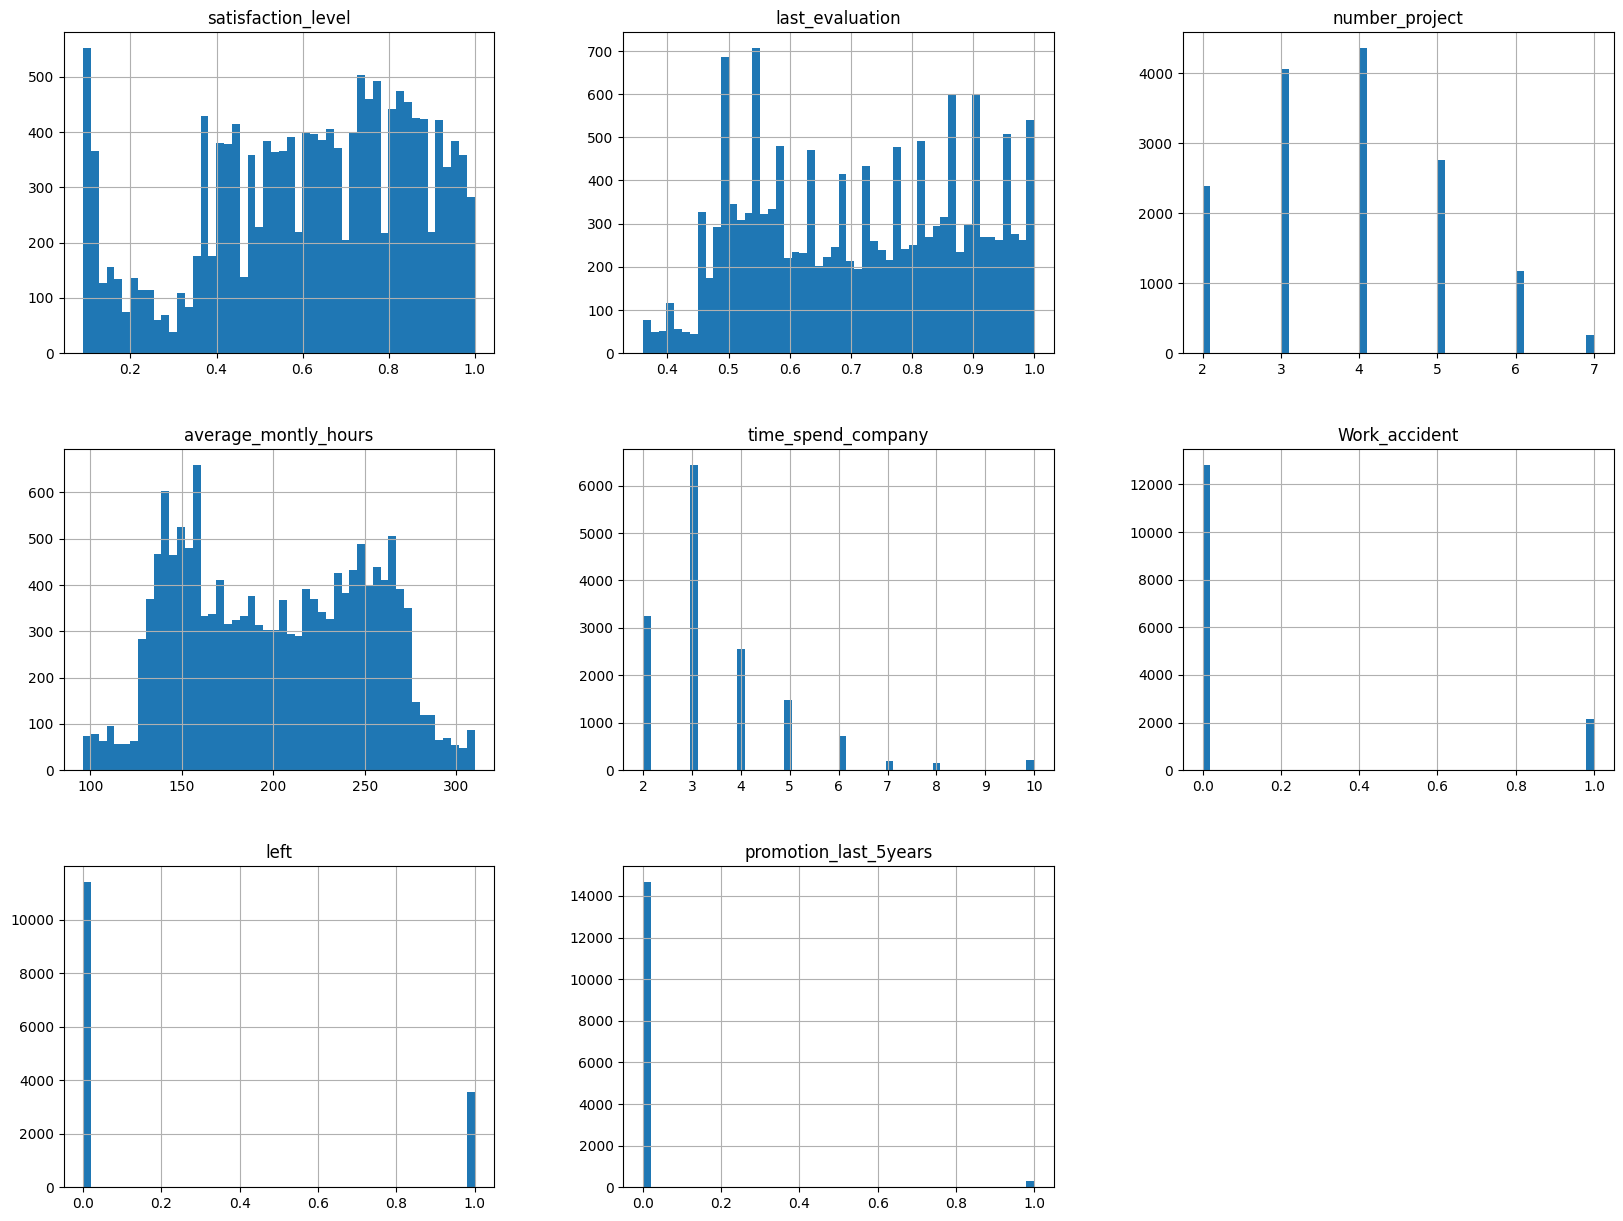

In [65]:
hr.hist(bins=50,figsize=(20,15))

In [66]:
hr.groupby('left').mean()

C:\Users\utkrisht_dutta\AppData\Local\Temp\ipykernel_14172\2087316466.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot: xlabel='salary'>

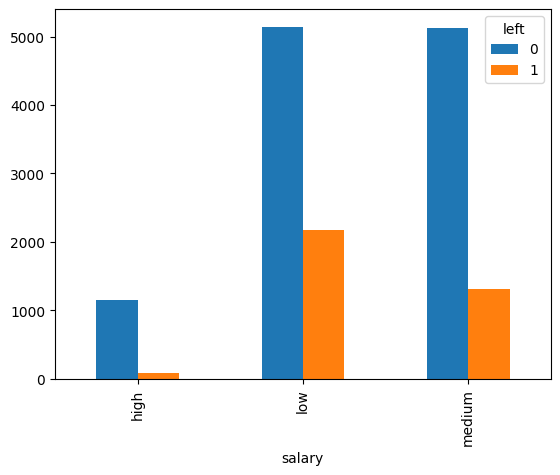

In [67]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

<AxesSubplot: xlabel='Department'>

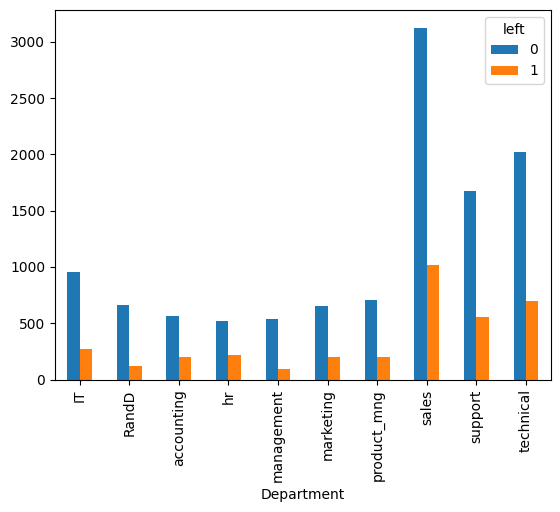

In [68]:
pd.crosstab(hr.Department,hr.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

In [69]:
new= hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [70]:
#convert salry into digits
salary_dummy=pd.get_dummies(new.salary,prefix='salary')

In [71]:
hr_with_salary=pd.concat([new,salary_dummy],axis='columns')

In [72]:
hr_with_salary.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [73]:
hr_with_salary.drop('salary',axis='columns',inplace=True)
hr_with_salary.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(hr_with_salary,hr[['left']],train_size=0.8)

In [75]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
3956,0.44,170,0,0,1,0
9120,0.76,168,0,1,0,0
4468,0.96,200,0,0,0,1
3599,0.76,219,0,0,1,0
12453,0.37,145,0,0,0,1
...,...,...,...,...,...,...
4876,0.80,260,0,0,1,0
14362,0.45,154,0,0,1,0
7826,0.67,148,0,0,0,1
12585,0.40,139,0,0,1,0


In [76]:
Y_train

,left
3956,0
9120,0
4468,0
3599,0
12453,1
...,...
4876,0
14362,1
7826,0
12585,1


Apply Logestic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [78]:
model.fit(X_train,Y_train)

c:\Users\utkrisht_dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [79]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
model.score(X_test,Y_test)

0.7753333333333333

In [81]:
model.coef_

array([[-3.80712104e+00,  2.40721210e-03, -1.16655328e+00,
        -9.89874532e-01,  7.56097914e-01,  2.83778851e-01]])

In [82]:
model.intercept_

array([0.03909496])

In [83]:
from joblib import dump,load
dump(model,'Employee_retention.joblib')

['Employee_retention.joblib']